In [60]:
import pandas as pd

dataset = pd.read_csv('iris.csv').values # .values is load this directry as a numpay array

# print(dataset)

In [61]:
import pandas as pd

dataset=pd.read_csv('iris.csv').values

data=dataset[:,0:4]
target=dataset[:,4]

In [62]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() # An empty NN created

# impliment 64 neurons layer, input demantion is 4 , that mean coming request from 4 neurons (automatically define input layer)
model.add(Dense(64,input_dim = 4,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax')) #Softmax give us probablities so the output addtion equal = 1

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

D:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,091 (66.76 KB)

 Trainable params: 17,091 (66.76 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
new_target = []

for i in target:
    if(i == 'setosa'):
        new_target.append(0)
    elif(i == 'versicolor' ):
        new_target.append(1)
    else:
        new_target.append(2)
        
        

In [64]:
from keras.utils import to_categorical

new_target = to_categorical(new_target)

In [65]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,new_target,test_size = 0.1)

In [66]:
import numpy as np

# Assuming train_data is your input data
train_data = train_data.astype('float32')
train_data = np.array(train_data)

In [67]:
history = model.fit(train_data,train_target,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3208 - loss: 1.2933
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3794 - loss: 1.0873  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6232 - loss: 1.0373  
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7580 - loss: 1.0060  
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6997 - loss: 0.9905  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7323 - loss: 0.9716  
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6705 - loss: 0.9705  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8462 - loss: 0.9364 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7651 - loss: 0.9133  
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8078 - loss: 0.8983 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9338 - loss: 0.8718 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.82

In [68]:
model.save('FFNN_iris.h5')

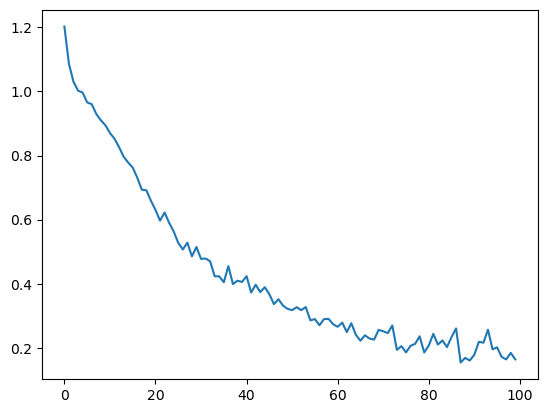

In [69]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

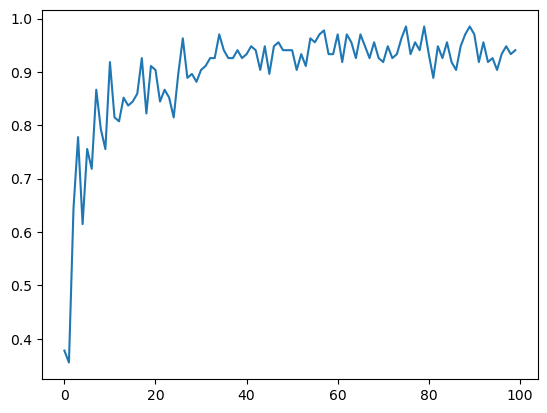

In [71]:
plt.plot(history.history['accuracy'])

In [74]:

test_data = test_data.astype('float32')
test_data = np.array(test_data)
predicted_target = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [75]:
print('Actual result ', test_target)
print('Predicted reuslt ' , predicted_target)

Actual result  [[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
Predicted reuslt  [[4.6328702e-03 3.5790136e-01 6.3746583e-01]
 [9.9012685e-01 9.8603722e-03 1.2707689e-05]
 [9.7944754e-01 2.0487053e-02 6.5338667e-05]
 [9.0360601e-04 1.6746590e-01 8.3163047e-01]
 [5.9982613e-05 2.9259529e-02 9.7068059e-01]
 [3.6045577e-04 6.0298368e-02 9.3934119e-01]
 [4.6728656e-04 5.8059234e-02 9.4147342e-01]
 [3.3061278e-05 1.4740803e-02 9.8522621e-01]
 [2.6265404e-04 3.8085315e-02 9.6165204e-01]
 [9.9647874e-01 3.5195721e-03 1.6886897e-06]
 [3.6211994e-05 1.5844304e-02 9.8411947e-01]
 [1.9124028e-04 3.4373116e-02 9.6543556e-01]
 [2.2653232e-03 2.6475471e-01 7.3297995e-01]
 [2.5789559e-04 5.4138642e-02 9.4560343e-01]
 [1.3942775e-02 8.5211217e-01 1.3394502e-01]]


In [77]:
print('Actual result ', np.argmax(test_target, axis =1 ))
print('Predicted reuslt ' , np.argmax(predicted_target,axis =1))

Actual result  [1 0 0 2 2 2 2 2 2 0 2 2 1 2 1]
Predicted reuslt  [2 0 0 2 2 2 2 2 2 0 2 2 2 2 1]
